309653002 林暐軒

HW4.1 $\hspace{2cm}$  An uniformly charged line

Consider a line charged uniformly with $\rho(\vec{r})=\lambda\delta(𝑥−𝑥_0,𝑦−𝑦_0)$ with $(x_0,𝑦_0)=(0,0)$ along the z-direction, where 𝜆 stands for the 1D charge density of the charged line. The Poisson’s equation describing the electrostatic system turns out to be a 2D problem and is written as 
$$\frac{\partial^2 𝑉}{\partial𝑥^2}+\frac{\partial^2 𝑉}{\partial𝑦^2}=−𝜆𝛿(𝑥,𝑦).$$


1 .Write a code to generate the matrix and vector of 𝑨 and 𝝆 in the FDM for arbitrary number of 2D grids i,j=0,1,2,..𝑁.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# discrete the domain and find the singular point
n=10 
lamb=1
x=np.linspace(-1,1,n+1)
x=x[1:-1]
y=np.linspace(-1,1,n+1)
y=y[1:-1]
[X,Y]=np.meshgrid(x,y)
grid_points=np.hstack([X.reshape((n-1)**2,1),Y.reshape((n-1)**2,1)])
grid_points.reshape(n-1,n-1,2)[int(n/2)-1][int(n/2)-1]

array([0., 0.])

In [3]:
def generate_matrix_A(n):
    T=np.eye(n-1,k=1)-4*np.eye(n-1)+np.eye(n-1,k=-1)
    I=np.eye(n-1)
    I2=np.eye(n-1,k=1)+np.eye(n-1,k=-1)
    A=np.kron(I,T)+np.kron(I2,I)
    return A

In [4]:
def generate_vector_pho(n,lamb):
    h=1/n
    F=np.zeros([(n-1)**2,1])
    F=F.reshape(n-1,n-1)
    F[int(n/2)-1][int(n/2)-1]=-1*lamb*(1/(h))**2
    F=F.reshape((n-1)**2,1)
    
    return F

2.Solve 𝑽=𝑨^(−𝟏) 𝝆 with the use of 𝑁=3,11,51,…..

3.Plot the contours of the solved potential in the x-y plane.


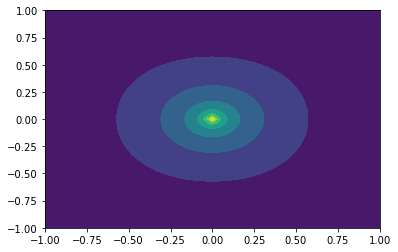

In [5]:
N=51
n=N-1
lamb=1

A=generate_matrix_A(n)
F=generate_vector_pho(n,lamb)

V=np.linalg.solve(A,F)

V=V.reshape(n-1,n-1)

x=np.linspace(-1,1,n+1)
y=np.linspace(-1,1,n+1)
[X,Y]=np.meshgrid(x,y)
Z=np.zeros([n+1,n+1])
for i in range(n-1):
    Z[1+i:2+i][0][1:-1]=V[i]
plt.contourf(X,Y,Z)